In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC


%matplotlib inline
%run -i 'lib.py'

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

<Figure size 432x288 with 0 Axes>

In [78]:
df = pd.read_csv('./DataScienceAssessment (1) (1).csv')
df.head(2)

,Product,CustomerGender,Location,Region,TotalPrice,StartDate,Deposit,DailyRate,TotalDays,AmountPaid30,AmountPaid60,AmountPaid360,LoanStatus360
0,Product B,Male,Location 2,Region 2,16600,07/04/2014,2000,40,365,3121,4241,13621,Active
1,Product B,Male,Location 3,Region 3,16600,01/02/2015,2000,40,365,3061,4171,15041,Active


In [79]:
df.shape

(9195, 13)

In [80]:
df.dtypes

Product           object
CustomerGender    object
Location          object
Region            object
TotalPrice         int64
StartDate         object
Deposit            int64
DailyRate          int64
TotalDays          int64
AmountPaid30       int64
AmountPaid60       int64
AmountPaid360      int64
LoanStatus360     object
dtype: object

### Class Distribution

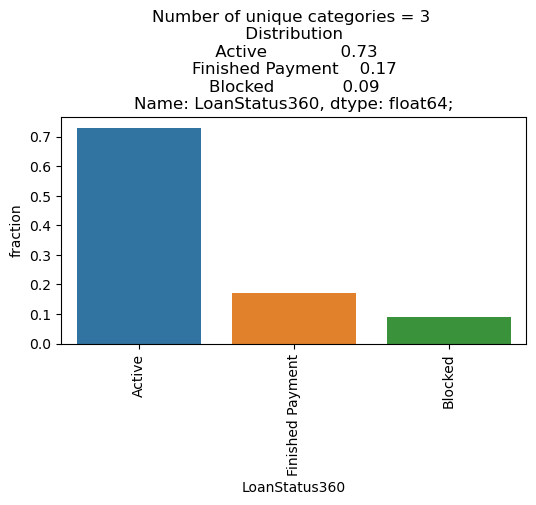

In [81]:
EDA_category(df, ['LoanStatus360'], y_size=3)

In [82]:
df.columns

Index(['Product', 'CustomerGender', 'Location', 'Region', 'TotalPrice',
       'StartDate', 'Deposit', 'DailyRate', 'TotalDays', 'AmountPaid30',
       'AmountPaid60', 'AmountPaid360', 'LoanStatus360'],
      dtype='object')

In [83]:
# df.Deposit.value_counts() # categorical
# df.DailyRate.value_counts() # categorical | input error here?
# df.TotalDays.value_counts() # drop this, it's redundant
# df.Location.value_counts() # combine sparse classes on this || drop
# df.Region.value_counts() # combine sparse classes on this || drop
# Use StartDate to get age of loan

#### Null Value Check

In [84]:
df.isna().sum() # no null values

Product           0
CustomerGender    0
Location          0
Region            0
TotalPrice        0
StartDate         0
Deposit           0
DailyRate         0
TotalDays         0
AmountPaid30      0
AmountPaid60      0
AmountPaid360     0
LoanStatus360     0
dtype: int64

In [85]:
df.drop(columns=['TotalDays', 'Location'], axis=1, inplace=True)

#### Combining sparse classes in 'Location'

In [86]:
# loc_df = pd.DataFrame(df.Location.value_counts())

In [87]:
# top_cats = loc_df[loc_df['Location'] >= 10].index.tolist() + ['other'] 
# df['Location'] = pd.Categorical(df['Location'], categories=top_cats).fillna('other')

#### OHE for categories

In [88]:
df['Deposit'] = df['Deposit'].astype('string')
df['DailyRate'] = df['DailyRate'].astype('string')

In [89]:
df['LoanStatus360'] = df.LoanStatus360.map({'Active': 1, 'Finished Payment': 2, 'Blocked': 0})

#### Age of Loan in hrs

In [90]:
df['StartDate'] = pd.to_datetime(df.StartDate, format='%m/%d/%Y')

In [91]:
df['StartYear'] = df['StartDate'].dt.year
df['StartMonth'] = df['StartDate'].dt.month

In [92]:
import datetime

today = pd.to_datetime('today')
df['LoanAgeHrs'] = (today - df['StartDate']).astype('timedelta64[h]')

In [93]:
df = pd.get_dummies(df, columns=['Product', 'CustomerGender', 'Region', 'Deposit', 'DailyRate', 'StartYear', 'StartMonth'])
df.shape

(9195, 63)

In [94]:
df.drop(columns=['StartDate'], axis=1, inplace=True)

In [95]:
df.head()

,TotalPrice,AmountPaid30,AmountPaid60,AmountPaid360,LoanStatus360,LoanAgeHrs,Product_Product A,Product_Product B,Product_Product C,Product_Product D,Product_Product E,Product_Product F,CustomerGender_Female,CustomerGender_Male,CustomerGender_NotSpecified,Region_Region 1,Region_Region 10,Region_Region 11,Region_Region 12,Region_Region 13,Region_Region 14,Region_Region 15,Region_Region 16,Region_Region 17,Region_Region 18,Region_Region 2,Region_Region 3,Region_Region 4,Region_Region 5,Region_Region 6,Region_Region 7,Region_Region 8,Region_Region 9,Deposit_1000,Deposit_2000,Deposit_2500,Deposit_4000,Deposit_8000,Deposit_9000,DailyRate_125,DailyRate_165,DailyRate_35,DailyRate_40,DailyRate_50,StartYear_2011,StartYear_2012,StartYear_2013,StartYear_2014,StartYear_2015,StartYear_2016,StartMonth_1,StartMonth_2,StartMonth_3,StartMonth_4,StartMonth_5,StartMonth_6,StartMonth_7,StartMonth_8,StartMonth_9,StartMonth_10,StartMonth_11,StartMonth_12
0,16600,3121,4241,13621,1,66092.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,16600,3061,4171,15041,1,61724.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
2,15600,2160,3280,15340,1,79844.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,16600,3041,4241,15321,1,60548.0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,20250,3470,4820,13720,1,72068.0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


### Separating independent and dependent variables

In [96]:
#independent variables
x = df.drop(['LoanStatus360'], axis=1)

#dependent variable
y = df['LoanStatus360']

### Creating the train and test dataset

In [97]:
#import the train-test split
from sklearn.model_selection import train_test_split

In [98]:
#divide into train and test sets
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 101, stratify=y, train_size=0.8)

## Cross Validation

In [99]:
models = [
    LinearSVC(),
    LogisticRegression(random_state=0)]

# 3 Cross-validation
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))

entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, train_x, train_y, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
    
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

In [100]:
cv_df

,model_name,fold_idx,accuracy
0,LinearSVC,0,0.809103
1,LinearSVC,1,0.589395
2,LinearSVC,2,0.749150
3,LinearSVC,3,0.582597
4,LinearSVC,4,0.770904
5,LogisticRegression,0,0.948370
6,LogisticRegression,1,0.935418
7,LogisticRegression,2,0.955133
8,LogisticRegression,3,0.934738
9,LogisticRegression,4,0.946295


## Logistic Regression

In [101]:
model = LogisticRegression(random_state=0)
model.fit(train_x, train_y)
y_pred = model.predict(test_x)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [105]:
print(f'Model Accuracy: {model.score(test_x,test_y)*100}%')

Model Accuracy: 95.21479064709081%
